Throughout the exercises for Regression in Python lessons, you will use the following example scenario: 

As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
import wrangle
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

The first step will be to acquire and prep the data. Do your work for this exercise in a file named wrangle.py.

Acquire customer_id, monthly_charges, tenure, and total_charges from telco_churn database for all customers with a 2 year contract.

In [2]:
df= wrangle.get_wrangle_telco_data()
df.head()
del df["Unnamed: 0"]

Walk through the steps above using your new dataframe. You may handle the missing values however you feel is appropriate.

In [3]:
df.isna().sum()

customer_id        0
monthly_charges    0
tenure             0
total_charges      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1695 non-null   object 
 1   monthly_charges  1695 non-null   float64
 2   tenure           1695 non-null   int64  
 3   total_charges    1695 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 53.1+ KB


In [9]:
df.total_charges = df.total_charges.str.replace(' ', '0').astype(float)

In [10]:
df.shape

(1695, 4)

In [11]:
df.describe()

,monthly_charges,tenure,total_charges
count,1695.000000,1695.000000,1695.000000
mean,60.770413,56.735103,3706.934336
std,34.678865,18.209363,2579.517834
min,18.400000,0.000000,0.000000
25%,24.025000,48.000000,1269.675000
50%,64.350000,64.000000,3593.800000
75%,90.450000,71.000000,5988.800000
max,118.750000,72.000000,8672.450000


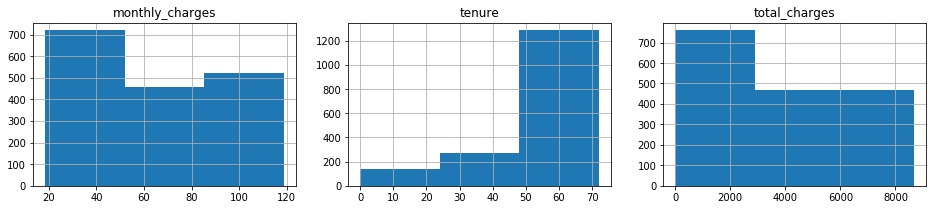

In [12]:
plt.figure(figsize=(16, 3))

for i, col in enumerate(['monthly_charges', 'tenure', 'total_charges']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(1,3, plot_number)
    plt.title(col)
    series.hist(bins=3)

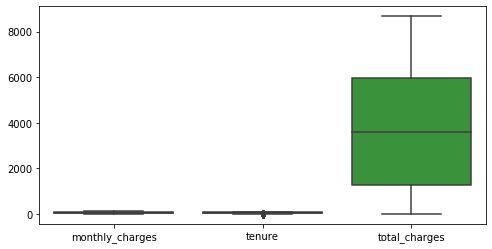

In [13]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df.drop(columns=['customer_id']))

End with a python file wrangle.py that contains the function, wrangle_telco(), that will acquire the data and return a dataframe cleaned with no missing values.

In [8]:
wrangle= wrangle.wrangle_telco(wrangle.get_wrangle_telco_data())
wrangle

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75
...,...,...,...,...
1690,9964-WBQDJ,24.40,71,1725.40
1691,9972-EWRJS,19.25,67,1372.90
1692,9975-GPKZU,19.75,46,856.50
1693,9993-LHIEB,67.85,67,4627.65
